# Cathay Pacific Equity Analysis
**Stock Code: 0293.HK**  
**Date: 2020-10-24**

# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Financials

Some essential financial figures from annual reports

In [2]:
df = pd.read_excel('data/financials.xlsx').set_index('Date')

In [3]:
df

,OrdinaryShares,NetProfit,OilHedgeProfit,NetAssetValue
Date,,,,
2013-12-31,3933.844572,2620,985,63013
2014-12-31,3933.844572,3150,-911,51853
2015-12-31,3933.844572,6000,-8474,48067
2016-12-31,3933.844572,-575,-8456,55526
2017-12-31,3933.844572,-1259,-6377,61272
2018-12-31,3933.844572,2345,-1445,63939
2019-12-31,3933.844572,1691,-101,62776
2020-06-30,3933.844572,-9865,-1599,49375


Latest common shares outstanding has increased substantially due to the capital restructuring plan by the Hong Kong Government.

In [4]:
ordinary_shares_20200930 = 6_437.200203
new_shares_issued = ordinary_shares_20200930 - df.OrdinaryShares[-1]
share_issue_price = 4.68
cash_raised = new_shares_issued*share_issue_price
bvps_old = df.NetAssetValue[-1]/df.OrdinaryShares[-1]
bvps_new = (df.NetAssetValue[-1]+cash_raised)/ordinary_shares_20200930

By the number of shares changed, and the share issue price, we can calculated the net cash raised after the right issue.

# Price

In [5]:
ohlcv = pd.read_csv('data/0293.HK.csv', index_col=0, parse_dates=True)

In [6]:
df = pd.concat([df, ohlcv.Close], axis=1).ffill().dropna()

In [7]:
df['MarketCap'] = df.Close * df.OrdinaryShares

We can calculate the market cap of the company in the past few years.

<AxesSubplot:xlabel='Date'>

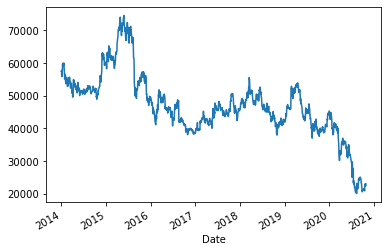

In [8]:
df.MarketCap.plot()

The share price of this company has lost more than half of its market cap in the last 5 years.

# Model

## P/E ratio

First thing to consider a company is its earnings power as relative to its market cap. i.e. the P/E ratio.

In [9]:
pe = df.MarketCap / df.NetProfit

<AxesSubplot:xlabel='Date'>

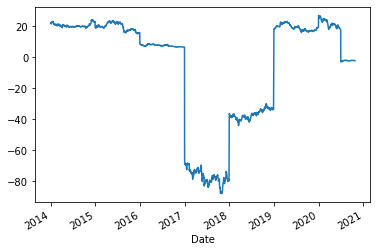

In [10]:
pe.plot()

This company is currently net loss, so using P/E ratio for valuation doesn't make sense.

## P/B Ratio

Then the last important thing is how much assets the company is holding on its balance sheet as compared to its market cap. i.e. the P/B ratio.

In [11]:
pb = df.MarketCap / df.NetAssetValue

<AxesSubplot:xlabel='Date'>

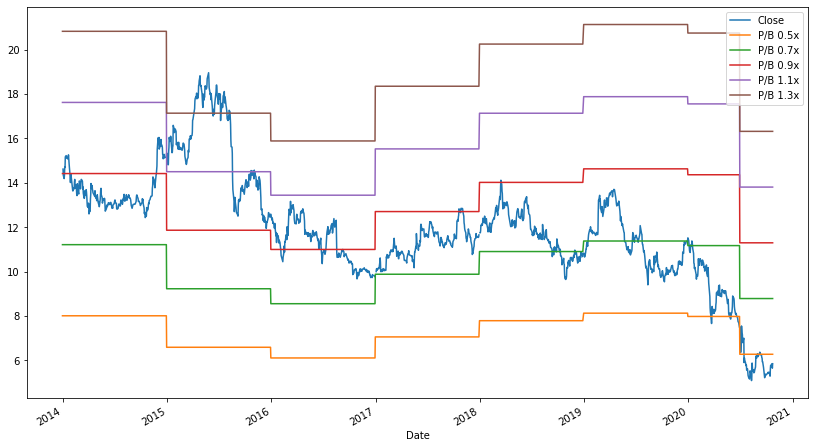

In [12]:
pd.concat([ohlcv.Close.loc['2014-01-01':]] + [
    (df.NetAssetValue/df.OrdinaryShares*m).rename(f'P/B {m:.1f}x') for m in np.arange(0.5,1.4,0.2)], 
          axis=1).plot(figsize=(14,8))

From the above we can see the P/B ratio was once over 1.0x back to 2015, but now it is only about 0.5x. Clearly the market was giving more and more discount to this company relative to its book value.

## Residual Income Valuation

As borrowed from CFA books, the intrinsic value of a company as given by its residual income is:   
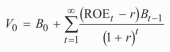

### Justified P/B Ratio

As derived from the residual income model, a company's justified P/B ratio should be given by:  
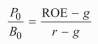


In [13]:
def justified_PB(roe, r=0.10, g=0.0):
    return (roe-g)/(r-g)

Assuming a required equity return of 10%, and 0% perpetual growth, the current 0.5x P/B ratio implied that the company can still delivered a 5% return on equity forever.

In [14]:
roe = df.NetProfit / df.NetAssetValue

Text(0, 0.5, 'ROE(%)')

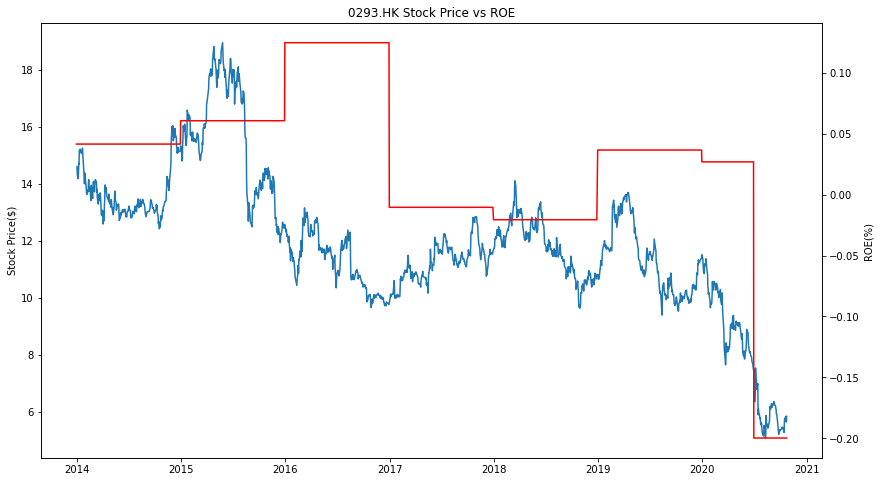

In [15]:
_, ax0 = plt.subplots(figsize=(14,8))
ax1 = ax0.twinx()
ax0.set_title('0293.HK Stock Price vs ROE')
ax0.plot(ohlcv.Close.loc['2014-01-01':], label='0293.HK Stock Price')
ax0.set_ylabel('Stock Price($)')
ax1.plot(roe, c='red', label='Return on Equity(%)')
ax1.set_ylabel('ROE(%)')

As you can see, the long term trend of share price roughly follows the ROE trend. ROE kept decreasing mostly due to demand dropping and intense competitions. Also due to the wrong crude oil hedging policy, the company has incurred a consistent hedging loss over the past 7 years, and that caused the company failed to deliver a stable ROE over that period.

In [16]:
bvps_old, bvps_new

(12.551334730262953, 9.49026011721823)

After 2020 right issue, approximately HKD 11.7 billion has been raised, but since the issue price was at a discount to the market price, the book value per share actually decreased to HKD 9.5 per share

### Target Price

In [17]:
target_price = justified_PB(0.05) * bvps_new

In [18]:
target_price

4.745130058609115

As the market price before the right issue implied a ROE of 5%, if we applied that to the new BVPS, then the target price is approximately HKD 4.75, which is still about 20% lower than currently market price. The stock still seems expensive given the bearish business outlook.